<a href="https://colab.research.google.com/github/tphlabs/Lab4_codesnippets/blob/main/Lab4_ESR_Codesnippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Electron spin resonance (ESR) experiment

Igor Gitelman, 2024, v0.2
Evgeny Kolonsky, Sep 2024

# Part 1. The ratio $k$ of magnetic field strength $H$ and current $I$.


In [2]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.signal import find_peaks as find_peaks # Find peaks inside a signal based on peak properties.
from scipy.stats import linregress as linregress #Calculate a linear least-squares regression for two sets of measurements.
from scipy.optimize import curve_fit # Use non-linear least squares to fit a function, f, to data.
import scipy.constants as const # Physical and mathematical constants and units.
from scipy.integrate import cumulative_trapezoid # Cumulatively integrate y(x) using the composite trapezoidal rule.

<h2>Initial calibration parameter</h2>

In [3]:
f0 = [0,  96.6e6] # calibration data point
f1 = [60, 95.5e6] # calibration data point
reading = 21
nuRF  = f0[1] + (f1[1] - f0[1]) / (f1[0] - f0[0]) * (reading - f0[0])
print(f'Resonanse frequency {nuRF/1e6:.2f} Mhz')

Resonanse frequency 96.22 Mhz


In [4]:
h = const.h  # taken from scipy constant module
muB = const.physical_constants['Bohr magneton'][0]
mu0 = const.mu_0
g = 2.002
Bres = h * nuRF / (g*muB)
Hres = Bres / mu0
print(f'resonanse B: {Bres:.1e} T')

resonanse B: 3.4e-03 T


## Measuring DC Volt-Ampere to find resistance R

Resistance R = 0.82 Ohm


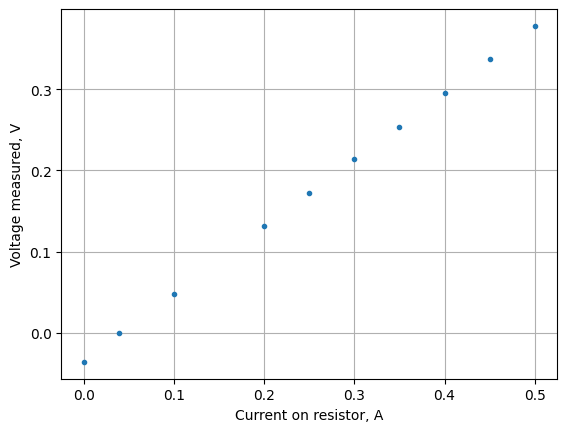

In [5]:
data = '''
0   -36
039 0
100 048
200 131
250 172
300 214
350 254
400 295
450 337
500 378
'''
I, V = np.genfromtxt(data.splitlines()).T
I *= 1e-3
V *= 1e-3
plt.plot(I,V,'.')
plt.grid()
plt.xlabel('Current on resistor, A')
plt.ylabel('Voltage measured, V')
fit = linregress(I, V)
R = fit.slope
v_offset = fit.intercept
print(f'Resistance R = {R:.2f} Ohm')

def get_current(voltage):
    return (voltage - v_offset) / R

## Measuring k by minimal modulation for resonance

As in previous labs we import our mesured data with the <b>pandas</b> module.

k = 4954 +- 294 1/m


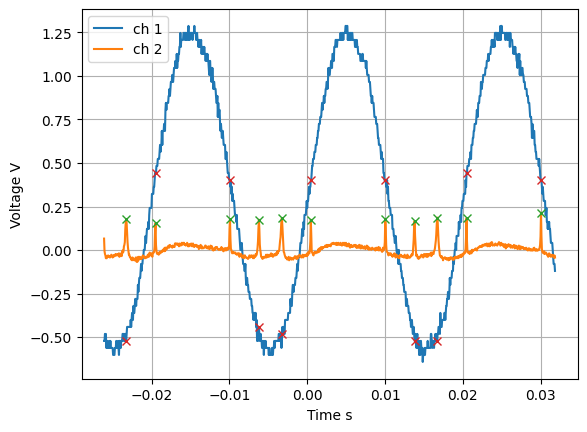

In [8]:
# Place your path to data here
# when using local Anaconda local UPLOAD file to localhost Anaconda server.

def get_peaks(voltage):
    peaks, _ = find_peaks(v2, height=0.10)
    return peaks
def get_k(t, v1, v2) -> float:
    peaks = get_peaks(v2)
    v1_peaks = v1[peaks]
    I1_peaks = get_current(v1_peaks) 
    k = Hres / np.abs(I1_peaks); # here you calculate k.
    k_av = np.mean(k)
    k_err = np.std(k)
    return k_av, k_err
    
URL = 'D:/Trace 0.csv'
t, v1, v2 = np.loadtxt(URL, skiprows=2, usecols=[3,4,5], delimiter=',').T
peaks = get_peaks(v2)
plt.plot(t,v1, label='ch 1') # plot the line and save the appropriate label.
plt.plot(t,v2, label='ch 2') #plot the peaks
plt.ylabel('Voltage V') #Y axis label
plt.xlabel('Time s') #X axis label
plt.grid() #put grid, optional

plt.plot(t[peaks], v2[peaks], 'x')
plt.plot(t[peaks], v1[peaks], 'x')
plt.legend() # put the legends
k_av, k_err = get_k(t, v1, v2)
print(f'k = {k_av:.0f} +- {k_err:.0f} 1/m')



In [9]:
for num in [0, 1, 2]:
    fname = f'D:/Trace {num}.csv'
    t, v1, v2 = np.loadtxt(fname, skiprows=2, usecols=[3,4,5], delimiter=',').T
    k_av, k_err = get_k(t, v1, v2)
    print(f'{num}: k = {k_av:.0f} +- {k_err:.0f} 1/m')    

0: k = 4954 +- 294 1/m
1: k = 5073 +- 264 1/m
2: k = 5013 +- 205 1/m
